<a href="https://colab.research.google.com/github/youtube-jocoding/pyupbit-autotrade/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pyupbit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyupbit

In [3]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2023-10-29 03:00:00,46427000.0,46551000.0,46401000.0,46516000.0,24.949274,1.159502e+09
2023-10-29 04:00:00,46549000.0,46550000.0,46463000.0,46482000.0,22.697410,1.055614e+09
2023-10-29 05:00:00,46526000.0,46533000.0,46435000.0,46447000.0,22.152270,1.030014e+09
2023-10-29 06:00:00,46447000.0,46526000.0,46433000.0,46520000.0,24.249317,1.127341e+09
2023-10-29 07:00:00,46518000.0,46530000.0,46367000.0,46441000.0,58.603387,2.720049e+09
...,...,...,...,...,...,...
2023-11-06 06:00:00,47118000.0,47120000.0,46670000.0,46796000.0,107.330589,5.029659e+09
2023-11-06 07:00:00,46738000.0,47127000.0,46724000.0,47123000.0,88.779965,4.161979e+09
2023-11-06 08:00:00,47125000.0,47489000.0,47013000.0,47056000.0,199.530127,9.421869e+09
2023-11-06 09:00:00,47056000.0,47197000.0,46850000.0,47113000.0,266.484602,1.253599e+10


In [4]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-10-29 03:00:00,46516000.0
1,2023-10-29 04:00:00,46482000.0
2,2023-10-29 05:00:00,46447000.0
3,2023-10-29 06:00:00,46520000.0
4,2023-10-29 07:00:00,46441000.0
...,...,...
195,2023-11-06 06:00:00,46796000.0
196,2023-11-06 07:00:00,47123000.0
197,2023-11-06 08:00:00,47056000.0
198,2023-11-06 09:00:00,47113000.0


In [5]:
#prophet 불러옴
from prophet import Prophet

In [6]:
#학습
model = Prophet()
model.fit(data)

10:12:08 - cmdstanpy - INFO - Chain [1] start processing
10:12:10 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

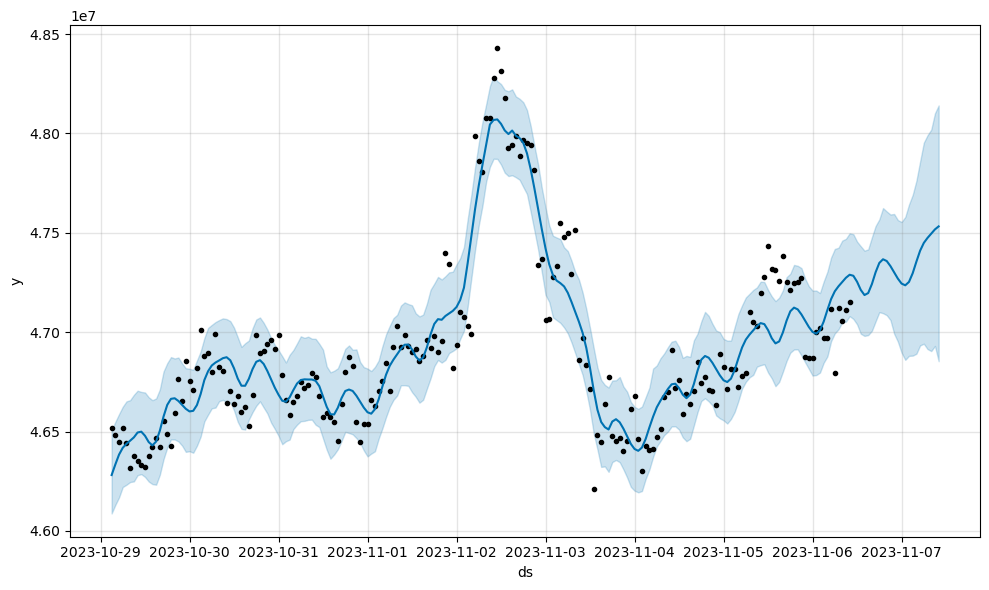

In [8]:
#그래프1
fig1 = model.plot(forecast)

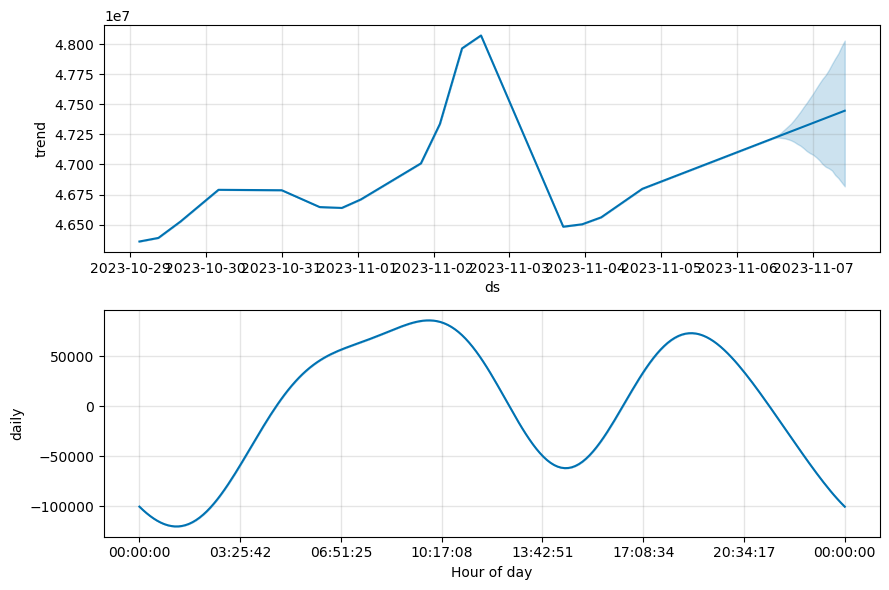

In [9]:
#그래프2
fig2 = model.plot_components(forecast)

In [10]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

47125000.0

In [12]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

47517191.17030317

In [13]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  47125000.0
종가의 가격:  47517191.17030317


In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-10-29 03:00:00,4.635998e+07,4.608762e+07,4.650493e+07,4.635998e+07,4.635998e+07,-78955.228171,-78955.228171,-78955.228171,-78955.228171,-78955.228171,-78955.228171,0.0,0.0,0.0,4.628102e+07
1,2023-10-29 04:00:00,4.636494e+07,4.613077e+07,4.654832e+07,4.636494e+07,4.636494e+07,-30674.789289,-30674.789289,-30674.789289,-30674.789289,-30674.789289,-30674.789289,0.0,0.0,0.0,4.633426e+07
2,2023-10-29 05:00:00,4.636989e+07,4.616839e+07,4.658762e+07,4.636989e+07,4.636989e+07,14036.963628,14036.963628,14036.963628,14036.963628,14036.963628,14036.963628,0.0,0.0,0.0,4.638393e+07
3,2023-10-29 06:00:00,4.637485e+07,4.622067e+07,4.662453e+07,4.637485e+07,4.637485e+07,43187.194482,43187.194482,43187.194482,43187.194482,43187.194482,43187.194482,0.0,0.0,0.0,4.641804e+07
4,2023-10-29 07:00:00,4.637981e+07,4.623218e+07,4.665157e+07,4.637981e+07,4.637981e+07,58323.059525,58323.059525,58323.059525,58323.059525,58323.059525,58323.059525,0.0,0.0,0.0,4.643813e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2023-11-07 06:00:00,4.740594e+07,4.694187e+07,4.795372e+07,4.694941e+07,4.783544e+07,43187.194482,43187.194482,43187.194482,43187.194482,43187.194482,43187.194482,0.0,0.0,0.0,4.744912e+07
220,2023-11-07 07:00:00,4.741608e+07,4.691497e+07,4.799099e+07,4.691207e+07,4.788137e+07,58323.059525,58323.059525,58323.059525,58323.059525,58323.059525,58323.059525,0.0,0.0,0.0,4.747440e+07
221,2023-11-07 08:00:00,4.742622e+07,4.690486e+07,4.801913e+07,4.688654e+07,4.792374e+07,69205.228450,69205.228450,69205.228450,69205.228450,69205.228450,69205.228450,0.0,0.0,0.0,4.749542e+07
222,2023-11-07 09:00:00,4.743636e+07,4.693051e+07,4.810123e+07,4.685216e+07,4.798019e+07,80834.738362,80834.738362,80834.738362,80834.738362,80834.738362,80834.738362,0.0,0.0,0.0,4.751719e+07
